<a href="https://colab.research.google.com/github/Shreeranga1/LogisticRegression/blob/main/LogisticRegressionPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np

In [255]:
df=pd.read_csv('https://raw.githubusercontent.com/Shreeranga1/LogisticRegression/main/Admission_Predict.csv')
df.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1


In [146]:
df.shape

(400, 9)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 28.2 KB


In [148]:
def checkForCategoricalVars(df):
  for item in df.columns:
    print(item)
    print(df[item].value_counts())
    print()

In [149]:
checkForCategoricalVars(df)

Serial No.
400    1
137    1
127    1
128    1
129    1
      ..
270    1
271    1
272    1
273    1
1      1
Name: Serial No., Length: 400, dtype: int64

GRE Score
324    19
312    19
316    14
322    14
314    14
321    13
325    13
311    12
317    12
320    12
327    12
308    11
326    11
313    11
323    10
315    10
329     9
300     9
319     9
318     9
310     8
307     8
305     8
304     8
301     8
299     8
340     8
331     8
334     7
298     7
330     6
309     6
332     6
306     6
328     6
303     5
336     5
302     5
296     5
335     4
295     4
338     4
333     4
297     4
339     3
294     2
290     2
337     1
293     1
Name: GRE Score, dtype: int64

TOEFL Score
110    37
105    28
107    26
104    25
106    24
112    21
100    19
99     18
111    17
109    17
108    17
102    17
103    16
114    15
113    14
116    11
101    11
115     9
119     9
98      9
118     9
120     8
117     7
97      6
96      4
95      2
93      2
94      1
92      1
Name: TOEFL 

So we got to know that Research is binary

In [150]:
df.Research=df.Research.astype(object)

We Dont need serial number hence removing it 

In [151]:
df.drop(labels='Serial No.',axis=1,inplace=True)

In [152]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


Check for normality

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

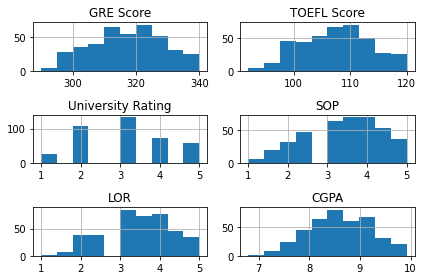

GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
dtype: float64

In [154]:
df.drop(labels='Chance of Admit',axis=1).hist()
plt.tight_layout()
plt.show()
df.drop(labels='Chance of Admit',axis=1).skew()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


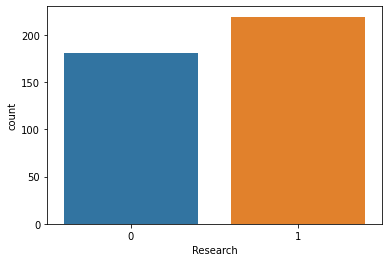

In [155]:
sns.countplot(df.Research)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


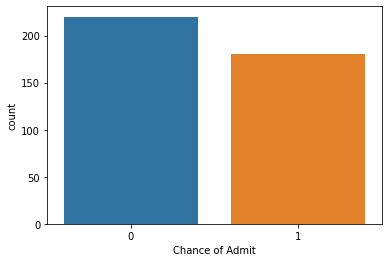

In [156]:
sns.countplot(df['Chance of Admit'])

Check for missing values 

In [157]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [158]:
df_target=df['Chance of Admit']

In [159]:
df_feature=df.drop(labels='Chance of Admit',axis=1)

In [160]:
df_num=df_feature.select_dtypes('number')

In [161]:
df_num.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337,118,4,4.5,4.5,9.65
1,324,107,4,4.0,4.5,8.87
2,316,104,3,3.0,3.5,8.00
3,322,110,3,3.5,2.5,8.67
4,314,103,2,2.0,3.0,8.21


In [162]:
df_cat=df_feature.select_dtypes(include = [np.object])

In [163]:
df_cat.head()

,Research
0,1
1,1
2,1
3,1
4,0


Convert Categorical variable two columns

In [164]:
dummy_var=pd.get_dummies(data=df_cat,drop_first=True)

In [165]:
dummy_var

,Research_1
0,1
1,1
2,1
3,1
4,0
...,...
395,1
396,1
397,1
398,0


Scale data

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
X_scaler=StandardScaler()

In [168]:
num_scaled=X_scaler.fit_transform(df_num)

In [169]:
df_num_scaled=pd.DataFrame(data=num_scaled,columns=df_num.columns)

Concat cat and num

In [170]:
X=pd.concat([df_num_scaled,dummy_var],axis=1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0


Train Test split

In [171]:
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm

Add intercept 

In [172]:
X=sm.add_constant(X)

In [173]:
X.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1
0,1.0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,1
1,1.0,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,1
2,1.0,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,1
3,1.0,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,1
4,1.0,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,0


In [174]:
x_train,x_test,y_train,y_test=train_test_split(X,df_target,random_state=10,test_size=0.2)

In [175]:
x_train.shape

(320, 8)

In [176]:
x_test.shape

(80, 8)

In [177]:
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

In [207]:
# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [179]:
logreg=sm.Logit(y_train,x_train)

In [180]:
logreg=logreg.fit()

Optimization terminated successfully.
         Current function value: 0.241326
         Iterations 8


In [181]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      312
Method:                           MLE   Df Model:                            7
Date:                Sun, 27 Jun 2021   Pseudo R-squ.:                  0.6486
Time:                        16:49:53   Log-Likelihood:                -77.224
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 9.137e-58
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.7119      0.330     -2.157      0.031      -1.359      -0.065
GRE Score             0.6095      0.447      1.365      0.172      -0.266       1.485
TOEFL Score           0.

In [182]:
type(logreg.params)

pandas.core.series.Series

In [183]:
df_odds=pd.DataFrame(np.exp(logreg.params),columns=['Odds'])
df_odds

,Odds
const,0.490694
GRE Score,1.839477
TOEFL Score,1.220082
University Rating,1.800906
SOP,1.193371
LOR,1.668273
CGPA,13.836155
Research_1,1.789418


In [184]:
y_pred_prob=logreg.predict(x_test)
y_pred_prob

332    0.050634
111    0.800663
352    0.016492
205    0.000668
56     0.001146
         ...   
304    0.037234
187    0.997764
166    0.118340
64     0.549633
27     0.000442
Length: 80, dtype: float64

In [185]:
y_pred=[0 if x < 0.5 else 1for x in y_pred_prob]

In [186]:
y_pred[0:5]

[0, 1, 0, 0, 0]

Plot confusion matrix

In [187]:
from sklearn.metrics import confusion_matrix

In [188]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[33,  9],
       [ 5, 33]])

In [189]:
from sklearn.metrics import accuracy_score

In [190]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.825

In [191]:
from sklearn.metrics import precision_score

In [192]:
precision=precision_score(y_test,y_pred)
precision

0.7857142857142857

In [193]:
from sklearn.metrics import f1_score

In [194]:
f1_score(y_test,y_pred)

0.825

In [195]:
from sklearn.metrics import cohen_kappa_score

In [196]:
kappa=cohen_kappa_score(y_test,y_pred)
kappa

0.6508728179551122

In [197]:
from sklearn.metrics import roc_curve

In [198]:
fpr, tpr, thresholds=roc_curve(y_test,y_pred)

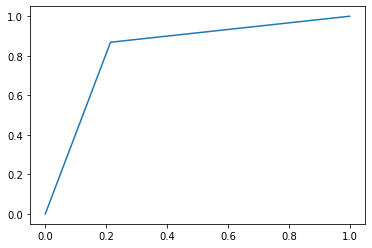

In [199]:
plt.plot(fpr, tpr)

In [200]:
thresholds

array([2, 1, 0])

In [201]:
from sklearn.metrics import roc_auc_score

In [202]:
roc_auc_score(y_test,y_pred)

0.8270676691729324

In [203]:
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [208]:
for value in cutoff:
  updateScoreCard(logreg, value)

In [219]:
np.sort(np.array(score_card['AUC Score']))[::-1][0]

0.8627819548872181

In [220]:
score_card[score_card['AUC Score']==0.8627819548872181]

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
5,0.6,0.862782,0.846154,0.868421,0.8625,0.724656,0.857143


Youden's index

In [222]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference']=youdens_table.TPR - youdens_table.FPR


In [223]:
youdens_table=youdens_table.sort_values('Difference',ascending=False).reset_index(drop=True)

In [224]:
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.868421,0.214286,1,0.654135
1,0.000000,0.000000,2,0.000000
2,1.000000,1.000000,0,0.000000


In [226]:
y_pred_youden=[0 if item < 0.62 else 1 for item in y_pred_prob]

In [227]:
cm = confusion_matrix(y_test, y_pred_youden)
cm

array([[36,  6],
       [ 6, 32]])

Check for recursive feature elimination

In [229]:
X_train_rfe=x_train.iloc[:,1:]
X_test_rfe = x_test.iloc[:,1:]

In [230]:
logreg = LogisticRegression()

In [231]:
from sklearn.feature_selection import RFE

In [232]:
rfe_model=RFE(estimator=logreg,n_features_to_select=3)

In [233]:
rfe_model = rfe_model.fit(X_train_rfe, y_train)

In [237]:
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

In [238]:
signi_feat_rfe = feat_index[feat_index==1].index

In [239]:
print(signi_feat_rfe)

Index(['GRE Score', 'University Rating', 'CGPA'], dtype='object')


In [241]:
logreg_rfe = sm.Logit(y_train, x_train[['const', 'GRE Score', 'University Rating', 'CGPA']]).fit()

# print the summary of the model
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.251732
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Chance of Admit   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Sun, 27 Jun 2021   Pseudo R-squ.:                  0.6335
Time:                        17:20:54   Log-Likelihood:                -80.554
converged:                       True   LL-Null:                       -219.78
Covariance Type:            nonrobust   LLR p-value:                 4.590e-60
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4202      0.205     -2.046      0.041      -0.823      -0.018
GRE Scor

In [247]:
y_pred_prob_rfe = logreg_rfe.predict(x_test[['const', 'GRE Score', 'University Rating', 'CGPA']])

In [248]:
y_pred_prob_rfe.head()

332    0.046820
111    0.727388
352    0.007586
205    0.000586
56     0.001808
dtype: float64

In [249]:
y_pred_rfe = [ 0 if x < 0.6 else 1 for x in y_pred_prob_rfe]

In [250]:
cm = confusion_matrix(y_test, y_pred_rfe)

In [251]:
cm

array([[36,  6],
       [ 7, 31]])

In [252]:
result = classification_report(y_test, y_pred_rfe)

In [254]:
print(result)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        42
           1       0.84      0.82      0.83        38

    accuracy                           0.84        80
   macro avg       0.84      0.84      0.84        80
weighted avg       0.84      0.84      0.84        80

